In [48]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


import time   # Calculo de tiempos de ejecución

import numpy as np  # Paquete numerico
import matplotlib.pyplot as plt # Paquete para graficos

from sklearn import cluster # Técnica de Clustering
from sklearn import datasets # Conjuntos de Datos Sinteticos
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics

%matplotlib inline

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pcasvd

import seaborn as sns
%matplotlib inline

In [70]:
# Diabetes Dataset

vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

In [71]:
diabetes.info()
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
TP         768 non-null int64
glucose    768 non-null int64
DBP        768 non-null int64
TSFT       768 non-null int64
insulin    768 non-null int64
mass       768 non-null float64
DPF        768 non-null float64
age        768 non-null int64
status     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,TP,glucose,DBP,TSFT,insulin,mass,DPF,age,status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


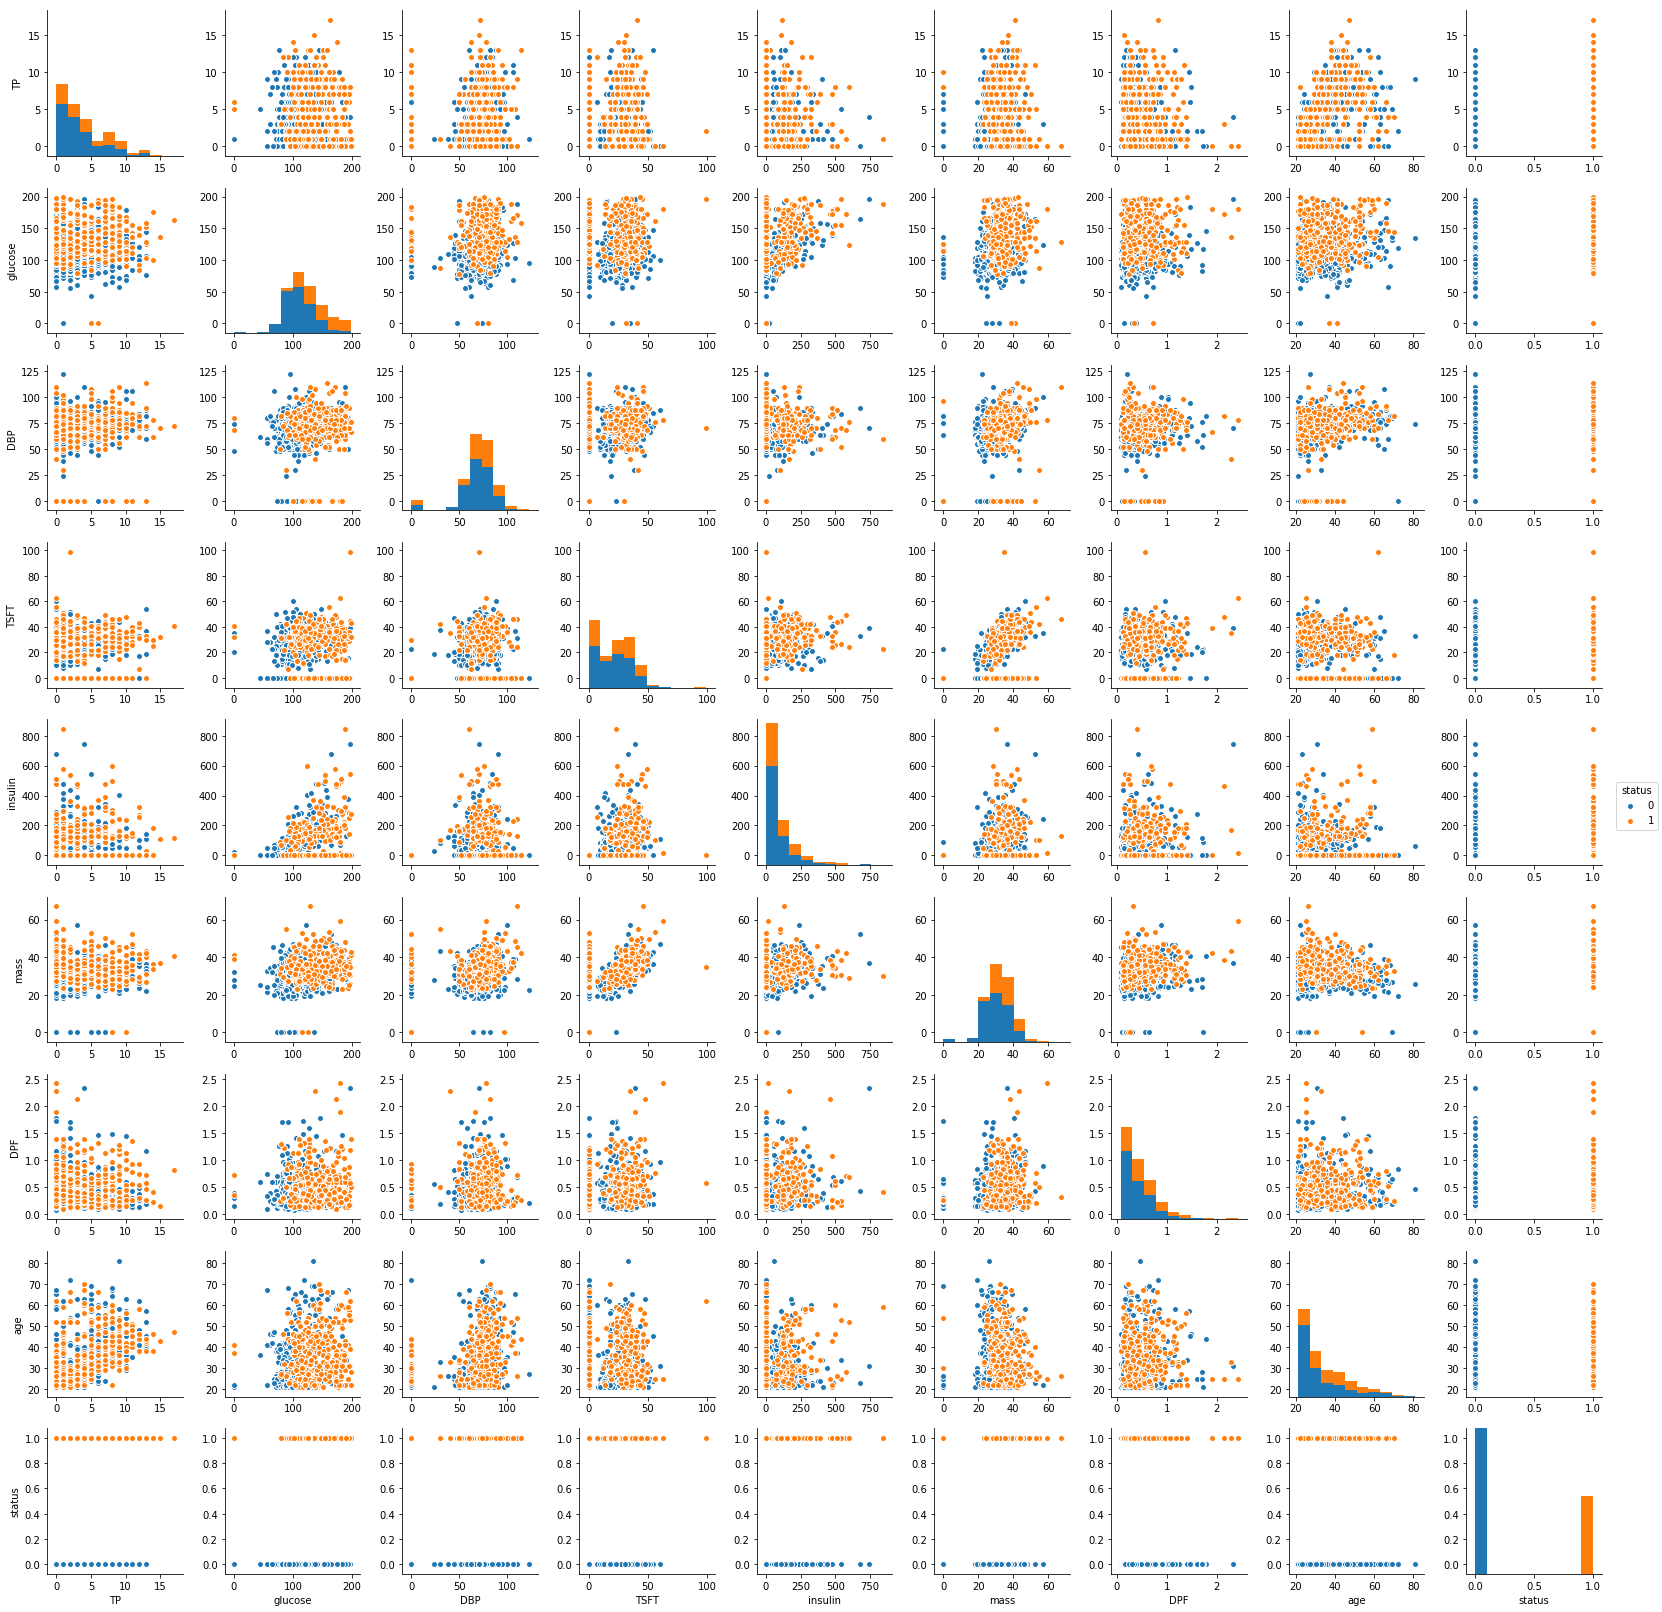

In [51]:
sns.pairplot(diabetes, hue='status')


## Preparando datos

Por ahora simplemente tomaremos como X todos las columnas menos "status" que sería nuestra clase. Y como clase tomaremos la variable "status". Faltaría eliminar los datos que estan erroneos, como los 0 en presión sanguinea, que no tiene sentido.

In [72]:

# DBP cannot be 0
# diabetes["DBP"] = diabetes["DBP"].apply(lambda x: np.nan if x == 0 else x)


# Ejes X e Y

X = diabetes.loc[:,"TP":"age"]
y = diabetes["status"]


## K-medias

In [73]:
algoritmo = cluster.KMeans(n_clusters=2)
t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

Tiempo de Ajuste: 0.04160881042480469


In [74]:
y_pred = algoritmo.labels_.astype(np.int)

In [75]:
labels = y_pred
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.026659
Completeness: 0.033141
V-measure: 0.029549
Adjusted Rand Index: 0.074387
Adjusted Mutual Information: 0.025675
Silhouette Coefficient: 0.568790
